<h1>Analysis Including Only Top 75% Respondents</h1>
<p>
<div class="explanation">
This analysis includes all slider and likert questions. But only
'serious' respondents are included. Seriousness was measured by
how many zeroes a respondent left. Serious respondents left at most
as many zeroes as 75% of all respondents. This procedure left 116 
respondents.
<p>
Three alternatives are presented for combining questions:
<ul>
<li>Pairwise correlations are computed from the answers to all questions.
These 6670 correlations are sorted, highest first. The resulting list can be
considered top to bottom. The lower a question pair is on the list, the
less similar the two questions are in the insights they capture.
</li>
<li>A dendrogram approach that uses the <a href="https://en.wikipedia.org/wiki/Ward%27s_method">
<i>Ward</i></a> algorithm for creating clusters
of 'related' questions, based on 'similarity' between the answers to those questions.
Similarity is measured by how similar the variances in the answers to the two questions are.</li>
<li>A dendrogram approach using the <a href="https://en.wikipedia.org/wiki/UPGMA"><i>UPGMA</i></a>
a.k.a. <i>averaging</i> algorithm.</li> Clusters are formed by minimizing the sum of 
distances between all pairs in one cluster and all pairs in neighboring clusters.
</ul>
The first method is the most direct and understandable.
</div>

In [1]:
     from IPython.core.display import HTML, display
     HTML("""
         <style>
           h1        {text-align : center}
           .subtitle {text-align : center}
           .explanation {font-size : large; 
                         line-height : 125%;
                        }
           .container { width:100% !important; }
           .highlight { background-color : yellow;}
           hr         { height : 3px;
                        background: black
                      }
         </style>
         """)


In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy import cluster
import numpy as np
import pandas as pd
import seaborn as sns
import os
from itertools import product
#import survey_utils

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

/Users/paepcke/anaconda2/envs/women_tech/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def hasnans(data):
    if isinstance(data, pd.DataFrame):
        return data.isnull().any().any()
    elif isinstance(data, pd.Series):
        return data.isnull().any()
    else:
        return data.isnull()


In [5]:
dataPath = os.path.join(os.getenv("HOME"), 
                        #'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersLikertByItem.csv'
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/likertSlidersByRespondentUnfolded.csv'
                       )

data = pd.read_csv(dataPath, sep=',')
# Make the question column the index, so that
# all operations on the dataframe only address
# the numeric scores:
qs = data.set_index('question')
# Replace 0s with their column's median.
#data = utils.replaceZerosDataFrame(data, direction='row')


In [7]:
# Drop all questions (rows) that nobody answered:
qs = qs.loc[~(qs==0).all(axis=1)]

In [8]:
# Drop all participants who answered no questions:
qs = qs[qs.columns[(qs != 0).any()]]

<div class="explanation">Find respondents who answered 'most' questions. Method:
Count the number of zeroes of every respondent. Sort
those numbers in increasing order. Accept the first
75% of the respondents.
</div>

In [124]:
num_zeroes = qs.transpose().apply(pd.Series.value_counts, axis=1)[0]
num_zeroes_sorted = num_zeroes.sort_values()
num_records = len(num_zeroes_sorted)
seventy_five_perc_cutoff = np.round(np.round(75*num_records/100)) # 163


In [146]:
num_zeroes_sorted
percentile_for_good = 60
cutoff = np.round(np.round(percentile_for_good*num_records/100))
print("Cutoff: %s" % cutoff)
print('Median number of zeroes all respondents: %s' % num_zeroes_sorted.median())
print('Mean number of zeroes all respondents: %s' % num_zeroes_sorted.mean())
print('75th percentile zeroes all respondents: %s' % num_zeroes_sorted.quantile(percentile_for_good / 100))
print
num_zeroes_sorted_goods = num_zeroes_sorted[:cutoff]
print('Median number of zeroes: %s' % num_zeroes_sorted_goods.median())
print('Mean number of zeroes: %s' % num_zeroes_sorted_goods.mean())
#print('75th percentile zeroes: %s' % num_zeroes_sorted_goods.quantile(percentile_for_good / 100)

num_zeroes_sorted_goods

Cutoff: 130
Median number of zeroes all respondents: 46.5
Mean number of zeroes all respondents: 52.880733945
75th percentile zeroes all respondents: 6.0

Median number of zeroes: 10.0
Mean number of zeroes: 20.5230769231


s100     6.0
s98      6.0
s97      6.0
s79      6.0
s48      7.0
s85      7.0
s57      7.0
s58      7.0
s60      7.0
s63      7.0
s65      7.0
s51      7.0
s90      7.0
s89      7.0
s68      7.0
s86      7.0
s69      7.0
s54      7.0
s71      7.0
s78      7.0
s95      7.0
s75      7.0
s77      8.0
s59      8.0
s91      8.0
s76      8.0
s37      8.0
s94      8.0
s49      8.0
s81      8.0
        ... 
s36     18.0
s42     18.0
s103    19.0
s104    20.0
s8      20.0
s109    45.0
s107    45.0
s111    46.0
s108    46.0
s110    47.0
s105    47.0
s106    48.0
s112    58.0
s113    58.0
s115    58.0
s114    59.0
s116    72.0
s117    72.0
s127    72.0
s119    72.0
s120    72.0
s126    72.0
s125    72.0
s123    72.0
s118    73.0
s124    73.0
s122    74.0
s121    74.0
s131    83.0
s133    83.0
Name: 0, dtype: float64

In [127]:
print('Median number of zeroes: %s' % num_zeroes.median())
print('Mean number of zeroes: %s' % num_zeroes.mean())
print('75th percentile zeroes: %s' % num_zeroes.quantile(0.75))

Median number of zeroes: 46.5
Mean number of zeroes: 52.880733945
75th percentile zeroes: 96.0


In [12]:

#num_zeroes_sorted.iloc[seventy_five_perc_cutoff] # 102
#num_zeroes_sorted.iloc[99:104]
#"num_zeroes_sorted

In [26]:
# Get list of ids for participants who were 
# with 75th percentile of non-zero entries.
# I.e. drop participants with the top 25% number
# of zero answers:
serious_respondent_ids = num_zeroes_sorted.iloc[0:seventy_five_perc_cutoff].index
good_qs = qs[serious_respondent_ids]
# Turn nums into floats:
good_qs = good_qs.astype(np.float)

# Now have:
#      s1,s2,s3,...
#   q1  1, 2, 3,...
#   q2  4, 5, 6,...

len(good_qs) # 116 questions
len(good_qs.columns) # 163 respondents

# Get same data as (for different uses below)
#     q1, q2, q2,...
# s1  1   2   3,...
# s2  4   5   6,...	

good_obs = good_qs.transpose()


In [14]:
html_str = '<span class="highlight">Number of serious questions: %s<br>' %  len(good_qs) +\
'Number of questions: %s' % len(good_qs.columns)
HTML(html_str)

<h2>Correlation Matrix Method for Finding Similar Questions</h2>

In [15]:
# Still have:
#      s1,s2,s3,...
#   q1  1, 2, 3,...
#   q2  4, 5, 6,...
#
# Transpose to get observations as rows, and columns as features:
#      q1,q2,q3,...
#   s1  1, 2, 3,...
#   s2  4, 5, 6,...

corr_matrix = good_obs.corr()
#corr_matrix.head(3)


In [16]:
# Get rid of the lower-left triangle of the correlation matrix:

#array([[ True, False, False],
#       [ True,  True, False],
#       [ True,  True,  True]], dtype=bool)

corr_matrix_tri_lower_mask = np.tril(np.ones(corr_matrix.shape).astype(np.bool))
#corr_matrix_tri_lower

# This mask to turn upper triangle into NaNs:
corr_matrix_tri_lower = corr_matrix.where(corr_matrix_tri_lower_mask)


<h3>Flatten matrix into a one-column DataFrame, then sort by decreasing correlation:</h3>

In [17]:
row_name_series = pd.Series(corr_matrix_tri_lower.index.values)
col_name_series = pd.Series(corr_matrix_tri_lower.columns.values)
# Get: Series([(SurveyItem1, SurveyItem1),
#              (SurveyItem1, SurveyItem2),
#              (SurveyItem1, SurveyItem3),
#              (SurveyItem2, SurveyItem1),
#              (SurveyItem2, SurveyItem2),
#              (SurveyItem2, SurveyItem3),
#                     ...
#            ])
all_cell_names  = pd.Series(list(product(row_name_series, col_name_series)))
#all_cell_names

# Flatten the correlation matrix into a 1-column DF:
corrs_df = pd.DataFrame(corr_matrix_tri_lower.values.flatten(), index=all_cell_names, columns=['Correlations'])

# Remove the diagonal 1s entries: 

# Currently the question-pairs are the index. Turn them into a 
# second column named 'Questions':
#                   	Questions                       	Correlations
#    0 	(PersonalExperience|ILackConfidence, PersonalE... 	1.000000
#    1 	(PersonalExperience|ILackConfidence, WorkLife|... 	0.620947

corrs_df = corrs_df.reset_index().rename(columns={'index' : 'Questions'})
corrs_df = corrs_df.where(corrs_df.Questions.apply(lambda x: x[0] != x[1])).dropna()
#corrs_df

# Sort by descending correlation:
# 	Questions 	Correlations
#9404 	(Team|NotPartOfGrp, Manager|HesitateToTakeChal... 	1.000000
#9755 	(Manager|HesitateToTakeChallenges, Team|NotPar... 	1.000000
#     ...
#2840 	(Promoted|UnsureWhatToDo, Promoted|DontWantClimb) 	0.995508
#968 	(Promoted|DontWantClimb, Promoted|UnsureWhatToDo) 	0.995508
#5330 	(Balance|ManagerSendsHome, Balance|CultureSupp... 	0.994896
#2405 	(Balance|CultureSupportive, Balance|ManagerSen... 	0.994896
#     ...
         
corrs_df.sort_values(by='Correlations', ascending=False, inplace=True)
#corrs_df
#len(corrs_df)

In [18]:
html_str = '<span class="highlight">Number of pairwise correlations: %s</span>' % len(corrs_df)
HTML(html_str)

<div class="explanation">List of pairwise correlations in descending order:</div>

In [19]:
# Print list of sorted correlations:
cm = sns.light_palette("green", as_cmap=True)

styled_corrs_df = corrs_df.style.background_gradient(cmap=cm)
styled_corrs_df

<hr>

<h2>Dendrogram Method Using Ward for Clustering</h2>
<div class="explanation">This method finds cluster members by grouping those questions that had very similar variances.
</div>

(Note: more readable question layout further down)


In [63]:
# Find the best algorithm for dendrogram clustering. Supposedly
# the algorithm with the largest Cophenet correlation coefficient
# tends to be best:

# Cophenet correlation coefficient measures 
# how faithfully a dendrogram preserves pairwise
# distance between the original data points, use
# the algo that yields the highest coefficient:

max_c = 0
max_algo = ''
max_cluster_info = None
algo_results = {}
for algo in ['ward', 'centroid', 'weighted', 'average', 'complete', 'single']:
    cluster_info = linkage(good_qs, algo)
    (c, coph_dists) = cophenet(cluster_info, pdist(good_qs))
    if c > max_c:
        max_c = c
        max_algo = algo
        max_cluster_info = cluster_info
    algo_results[algo] = {'cophenet_coeff' : c,
                          'cluster_info' : cluster_info
                          }
print("Winning Cophenet correlation coefficient is the '%s' algorithm: %s" % (max_algo, max_c))
# cluster_info = max_cluster_info
# algo = max_algo
print("... but using Ward (c= %s)" % algo_results['ward']['cophenet_coeff'])

algo = 'ward'
cluster_info = algo_results[algo]['cluster_info']


Winning Cophenet correlation coefficient is the 'average' algorithm: 0.866899197557
... but using Ward (c= 0.730963190973)


In [64]:
good_obs.head(4);
len(cluster_info) # 162
cluster_info[0]   # array([ 155.     ,  160.     ,   49.39636,    2.     ])

array([ 37.,  79.,  17.,   2.])

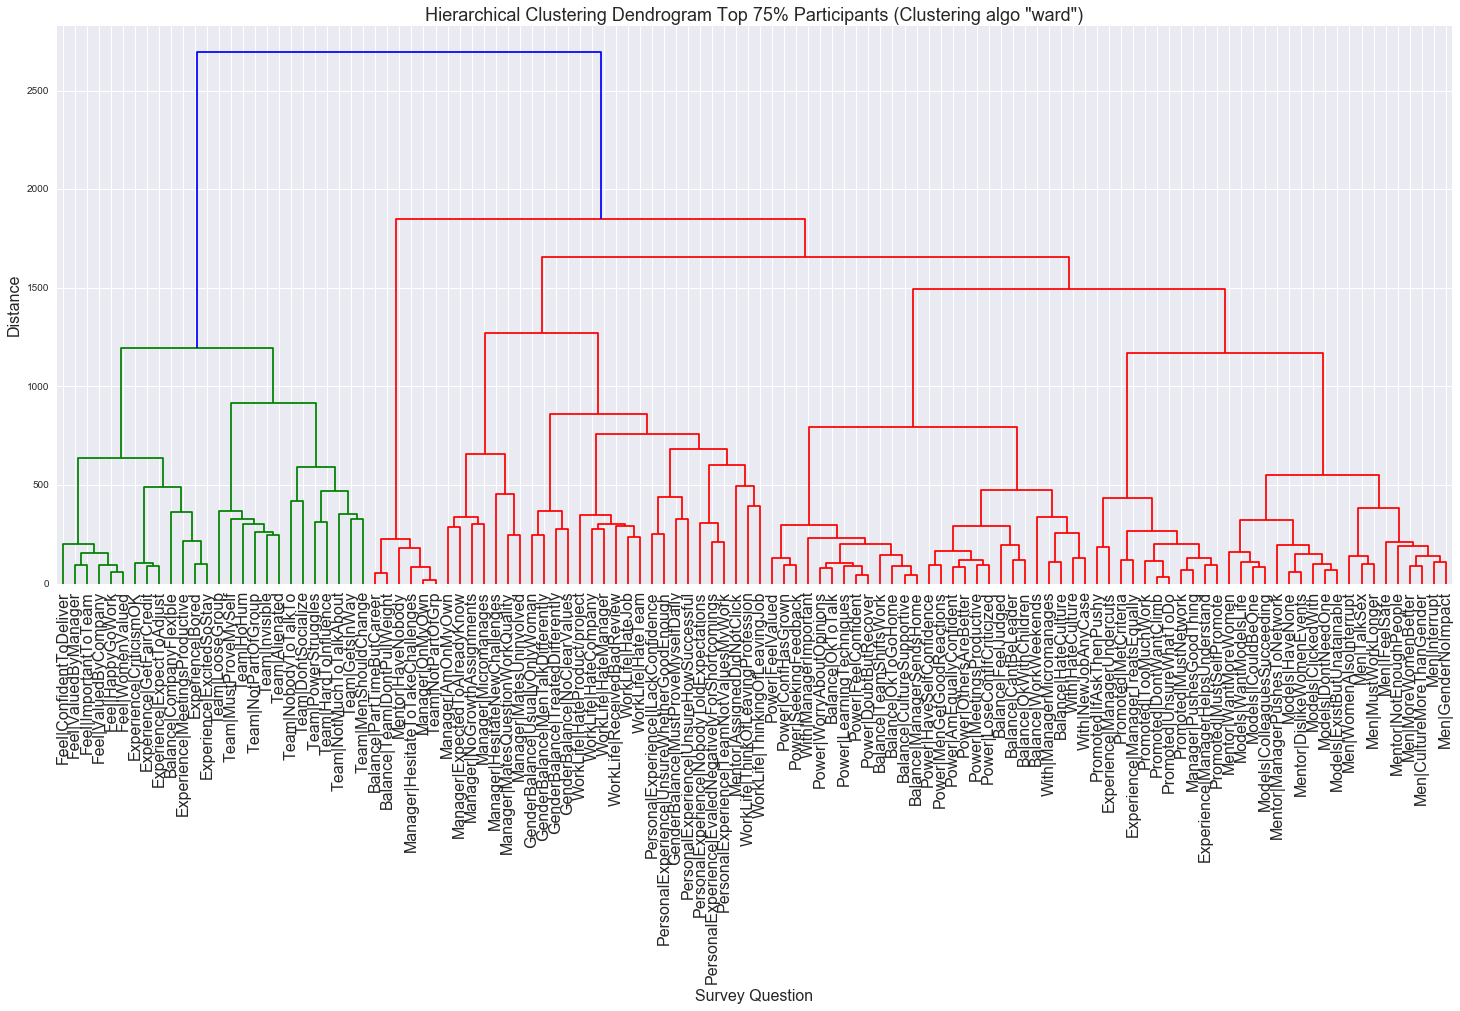

In [67]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
title = 'Hierarchical Clustering Dendrogram Top 75%% Participants (Clustering algo "%s")' % algo
plt.title(title, fontsize=18)
plt.xlabel('Survey Question', fontsize=16)
plt.ylabel('Distance', fontsize=16)
dendrogram_data = dendrogram(
        algo_results[algo]['cluster_info'],
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=good_qs.index
)
plt.show()



<div class="explanation">Make groups more readable:</div>

In [68]:
# Build a DataFrame that combines question, distance, and color.
# Then change the names of the one-letter colors to more readable
# expanded form:
clusters = zip(dendrogram_data['ivl'], dendrogram_data['leaves'], dendrogram_data['color_list'])
clusters = pd.DataFrame(clusters, columns=['Question', 'Distance', 'Color'])
clusters['Color'].replace(['g','r','b','c','m','y','k'], 
                          ['green','red','blue','cyan','magenta','yellow','black'],
                          inplace=True
                          )

# Save the Ward-based clusters for later:
ward_clusters = clusters.copy()
def cluster_table_styler(val):
    if val == 'green':
        return("background-color : green")
    elif val == 'red':
        return("background-color : red")
    elif val == 'blue':
        return("background-color : blue")
    elif val == 'cyan':
        return("background-color : cyan")
    elif val == 'magenta':
        return("background-color : magenta")
    elif val == 'yellow':
        return("background-color : yellow")
    elif val == 'black':
        return("background-color : black")
    else:
        return ''
    
clusters.style.applymap(cluster_table_styler)



<hr>

<h2>Alternative Dendrogram: using highest-cophenet-coefficient algorithm ('average'):</h2>
<div class="explanation">
The <i>average</i> clustering method minimizes the average distance between any two elements of neighboring clusters.
The method is also known as UPGMA <b>U</b>nweighted <b>P</b>air <b>G</b>roup <b>M</b>ethod with <b>A</b>rithmetic <b>M</b>ean.
</div>

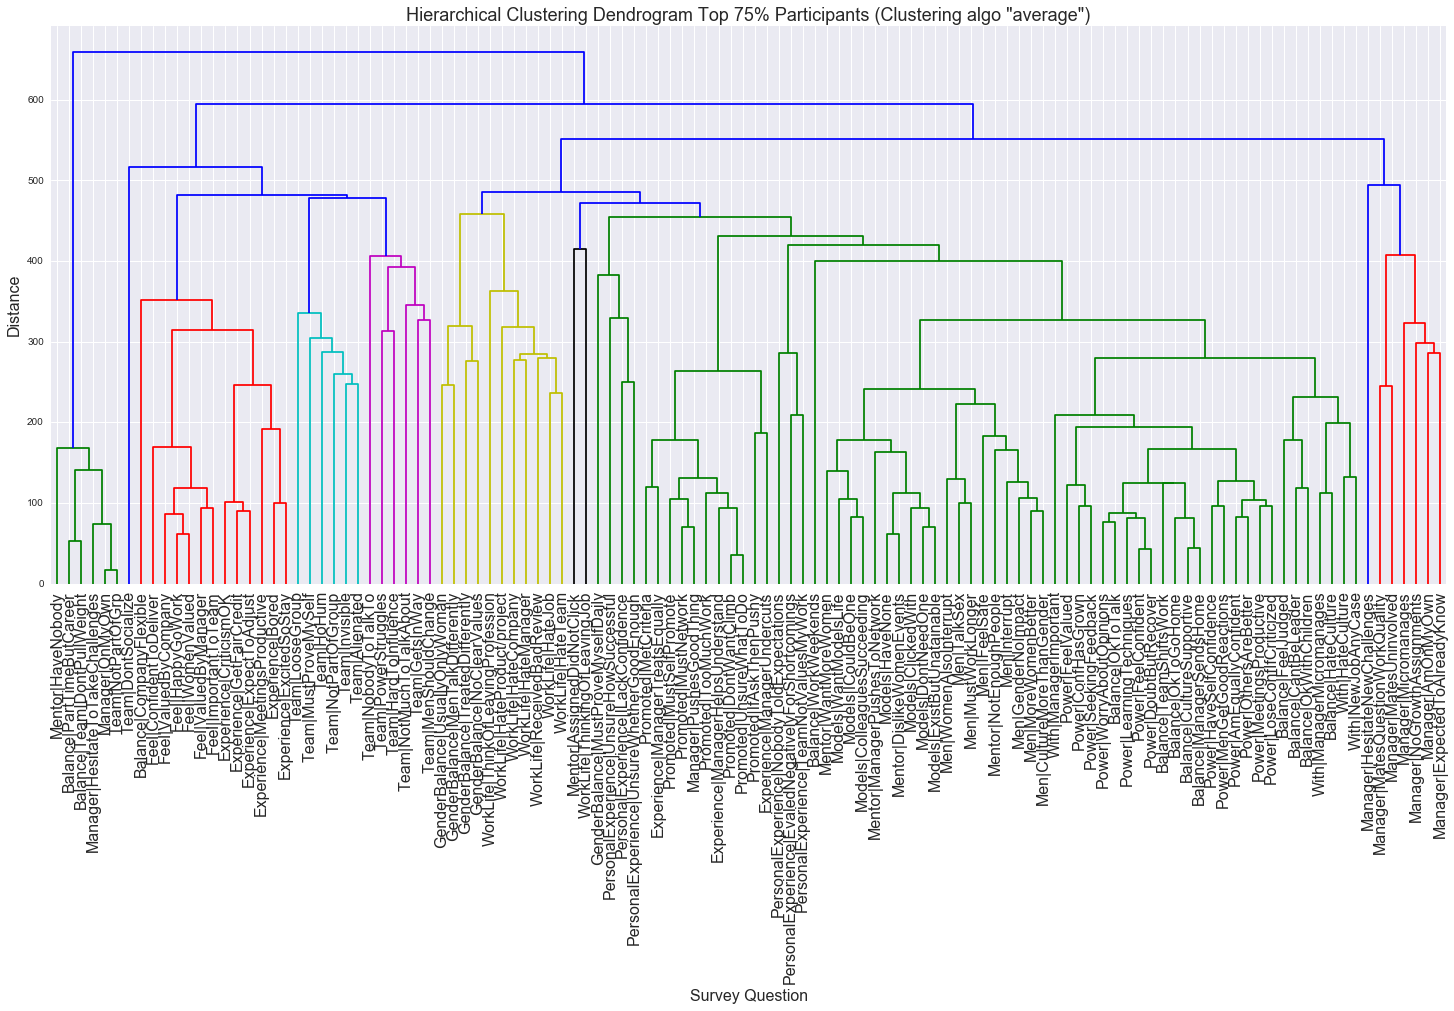

In [69]:
algo = max_algo

# calculate full dendrogram
plt.figure(figsize=(25, 10))
title = 'Hierarchical Clustering Dendrogram Top 75%% Participants (Clustering algo "%s")' % algo
plt.title(title, fontsize=18)
plt.xlabel('Survey Question', fontsize=16)
plt.ylabel('Distance', fontsize=16)
dendrogram_data = dendrogram(
        algo_results[algo]['cluster_info'],
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=good_qs.index,  # question names
)
plt.show()



<div class="explanation">
Make groups easier to read:
</div>

In [70]:
# Build a DataFrame that combines question, distance, and color.
# Then change the names of the one-letter colors to more readable
# expanded form:
clusters = zip(dendrogram_data['ivl'], dendrogram_data['leaves'], dendrogram_data['color_list'])
clusters = pd.DataFrame(clusters, columns=['Question', 'Distance', 'Color'])
clusters['Color'].replace(['g','r','b','c','m','y','k'], 
                          ['green','red','blue','cyan','magenta','yellow','black'],
                          inplace=True
                          )

def cluster_table_styler(val):
    if val == 'green':
        return("background-color : green")
    elif val == 'red':
        return("background-color : red")
    elif val == 'blue':
        return("background-color : blue")
    elif val == 'cyan':
        return("background-color : cyan")
    elif val == 'magenta':
        return("background-color : magenta")
    elif val == 'yellow':
        return("background-color : yellow")
    elif val == 'black':
        return("background-color : black")
    else:
        return ''

# Save 'average'-generated clusters for later:
average_clusters = clusters.copy()
    
clusters.style.applymap(cluster_table_styler)

<hr>

<h2>Cluster using K-Means, and plot some questions from the above groupings.</h2>

Compute clusters for k=1 to k=10. Plot the resulting 
overall distortion for each k. Then pick a k where
the curve has an 'elbow'. Our case, 4 clusters is an option:

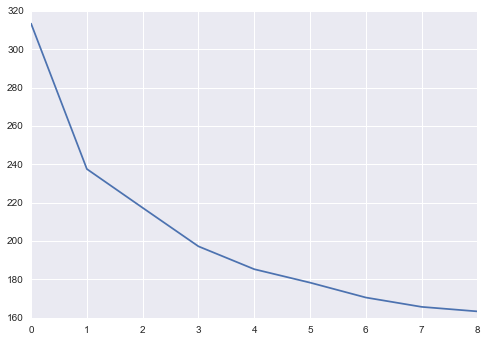

In [72]:
# Get clustering for k=1 to k=10 to see where distortion levels out:
initial = [cluster.vq.kmeans(good_obs, k) for k in range(1,10)]
#initial
plt.plot([distortion for (centroids, distortion) in initial])

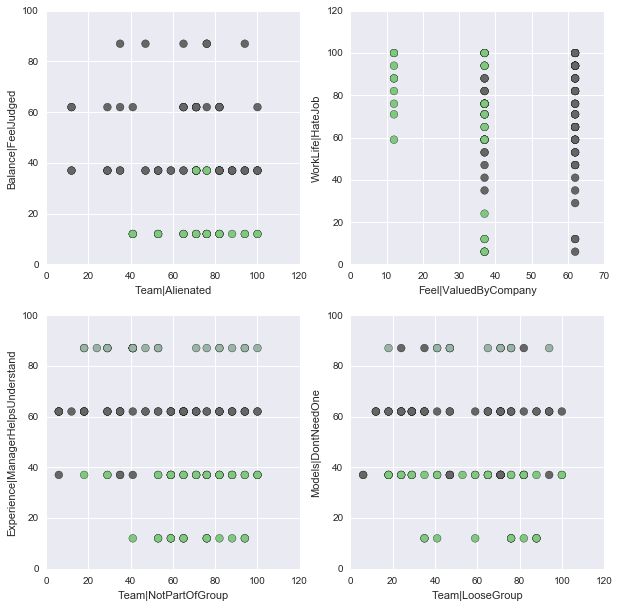

In [110]:
# Pick number of clusters:
num_clusters = 4
(centroids, distortion) = initial[num_clusters - 1]

# Get as many colors as we have clusters:
accent_map = plt.cm.get_cmap('Accent')
colors = accent_map(num_clusters)

# Assign each observation to one cluster:
(centroid_assignments, distortions) = cluster.vq.vq(good_obs, centroids)

green_ward_questions = ward_clusters[ward_clusters.Color == 'green']
red_ward_questions = ward_clusters[ward_clusters.Color == 'red']
cyan_ward_questions = ward_clusters[ward_clusters.Color == 'cyan']
blue_ward_questions = ward_clusters[ward_clusters.Color == 'blue']

#green_questions.sample().Question
#print(some_respondents[green_questions.sample().Question])
#green_questions

# Number of plots with different questions on x/y axes:
num_plots = 4
plot_cols = 2
plot_rows = int(np.ceil(num_plots / plot_cols))

# The axes_arr will have same shape as
# arrangement of plots: E.g. 3x2:
(fig, axes_arr) = plt.subplots(plot_rows,plot_cols)
axes = axes_arr.flatten()
fig.set_size_inches(10,10)

for i in range(num_plots):
    green_question = green_ward_questions.sample().Question
    red_question   = red_ward_questions.sample().Question
    
    green_responses = good_obs[green_question]
    # Remove respondents who didn't answer this particular question:
    green_responses = green_responses[green_responses > 0]

    red_responses = good_obs[red_question]
    # Remove respondents who didn't answer this particular question:
    red_responses = red_responses[red_responses > 0]

    
    the_plot = axes[i]
    the_plot.scatter(green_responses, red_responses,
                c=centroid_assignments, # color by centroid
                cmap=accent_map,
                s=60) # dot size
    the_plot.set_xlabel(green_question.values[0])
    the_plot.set_ylabel(red_question.values[0])
plt.show()


<hr>

In [ ]:
ward_clusters[ward_clusters.Color == 'green']
green_questions = ward_clusters[ward_clusters.Color == 'green']
red_questions = ward_clusters[ward_clusters.Color == 'red']
cyan_questions = ward_clusters[ward_clusters.Color == 'cyan']
blue_questions = ward_clusters[ward_clusters.Color == 'blue']

In [ ]:
ward_questions = ward_clusters['Question'].iloc[:31]
len(ward_questions)
#plt.plot(data[ward_questions])
some_respondents = good_obs.copy().ix[ward_questions].reset_index().rename(columns={'index' : 'Question'})
some_respondents = some_respondents.rename(columns={'question' : 'Question'})
thin_ward_clusters = ward_clusters[['Question', 'Color']].set_index('Question')
thin_some_respondents = some_respondents.set_index('Question')
thin_some_respondents = thin_some_respondents.join(thin_ward_clusters, how='inner')
#thin_some_respondents
#thin_ward_clusters


In [ ]:
import os
thin_some_respondents.reset_index().to_csv(os.path.join(os.getenv('HOME'), 'tmp/some_respondents.csv'))
thin_some_respondents
